# 라이브러리 임포트

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# 데이터불러오기

In [3]:
data = pd.read_csv('G:\\내 드라이브\\INSURANCE\\insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 데이터 확인및검증

In [3]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 탐색적 데이터분석 EDA

In [130]:
# 각 컬럼별 데이터분석 시각화

data.age

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

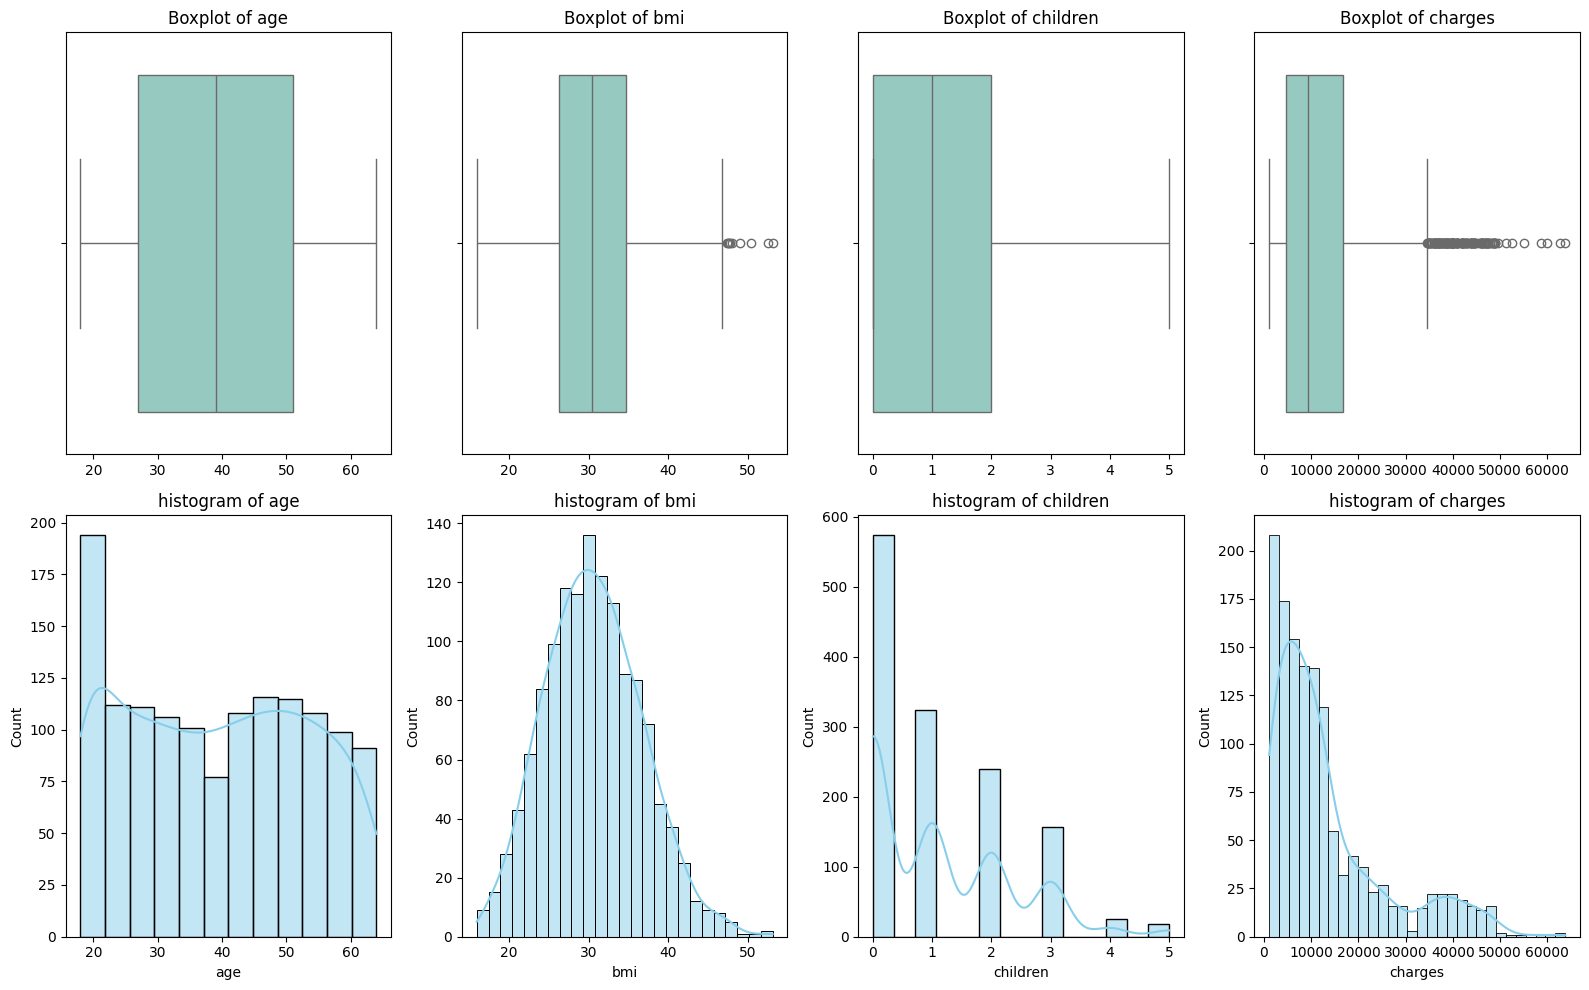

In [4]:
# 수치형 columns 시각화 및 분석
main_cols = ['age', 'bmi','children','charges']
# 각 수치형 데이터의 분포확인
fig, axes = plt.subplots(2, 4, figsize=(16, 10))

for i ,col in enumerate(main_cols):
    # 상단 박스플롯
    sns.boxplot(data=data, x=col, ax=axes[0,i],palette='Set3')
    axes[0,i].set_title(f"Boxplot of {col}")
    axes[0,i].set_xlabel('')

    # 하단 histplot
    sns.histplot(data=data, x=col, kde=True, ax=axes[1,i], color='skyblue')# hue='charges'
    axes[1,i].set_title(f"histogram of {col}")

plt.tight_layout()
plt.show()

# **누가 의료비를 많이내는가?**
### 나이가 많을수록 차지 상승
### bmi가 높고 흡연자일수록 의료비 기하급수적 상승
### 자녀의 유무
### 성별은 상관이 없는것으로 보여짐
### 나이가 많을수록 비싼가 어릴수록 비싼가
* 그렇다면 나이가 많고 흡연을 하고 bmi가 높을수록 매우 비쌀것임
* 반대로 나이가 어리고 흡연을 하고 bmi가 높다면 ?
* 나이 up / no smoke / bmi down

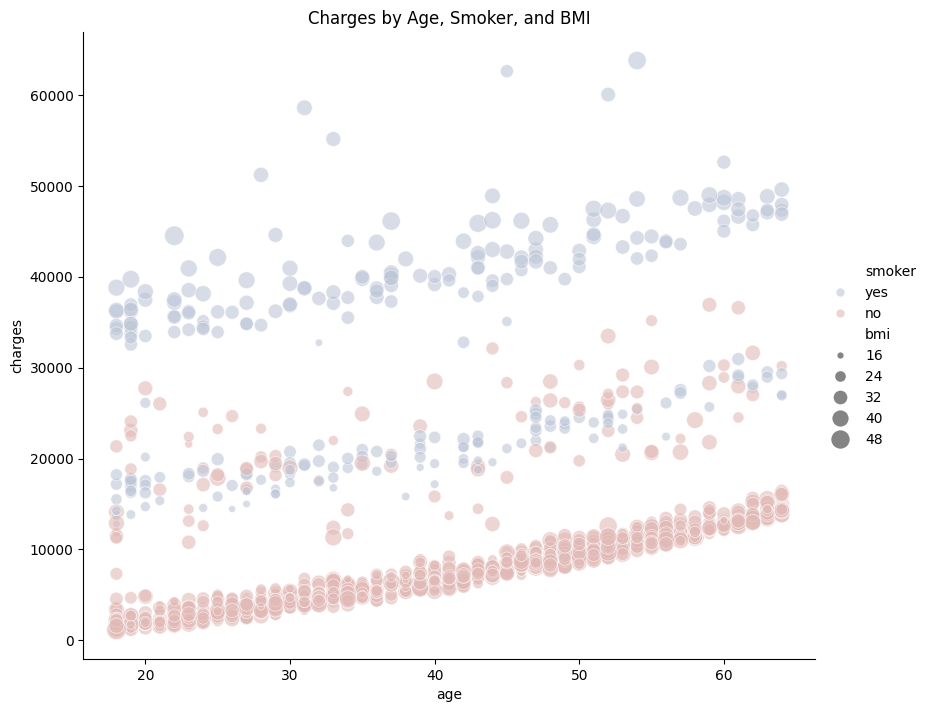

In [5]:
# relplot 을 사용하여 age/smoker/bmi가 charges에 어떤 영향이있는지 알아보기

sns.relplot(data=data,x='age', y='charges', hue='smoker', size='bmi',
    sizes=(20, 200), # 점 크기 범위 설정
    alpha=0.6,      # 점이 겹쳐도 보이게 투명도 조절
    palette='vlag',  # 색상 테마
    height=7, 
    aspect=1.2)

plt.title('Charges by Age, Smoker, and BMI')
plt.show()



# 인사이트 찾기
* 위 그래프로 보아 bmi와 smoker는 상관관계가 있다
* smoke / bmi low 사람들은 그래도 1~20000 사이 분포
* smoke / bmi high 사람들은 최상단 분포
### 결국 age,smoker,bmi 다 상관이 높음

In [6]:
# 예시: 비만인 흡연자 여부 추가
data['is_obese_smoker'] = ((data['bmi'] >= 30) & (data['smoker'] == 'yes')).astype(int)

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges,is_obese_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [11]:
data.tail()

,age,sex,bmi,children,smoker,region,charges,is_obese_smoker
1333,50,male,30.97,3,no,northwest,10600.5483,0
1334,18,female,31.92,0,no,northeast,2205.9808,0
1335,18,female,36.85,0,no,southeast,1629.8335,0
1336,21,female,25.80,0,no,southwest,2007.9450,0
1337,61,female,29.07,0,yes,northwest,29141.3603,0


In [7]:
data.is_obese_smoker.describe()

count    1338.000000
mean        0.108371
std         0.310964
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: is_obese_smoker, dtype: float64

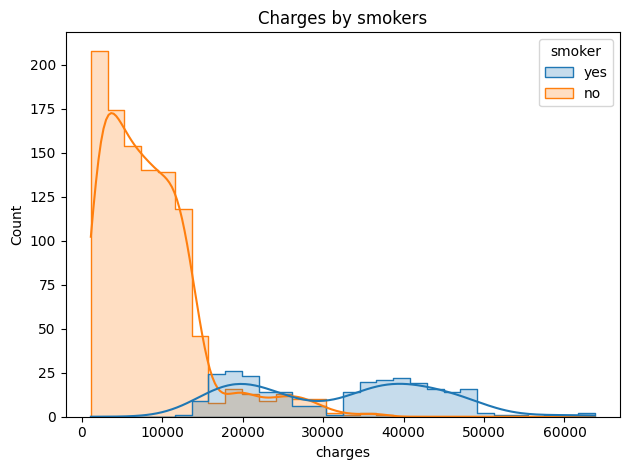

In [8]:
sns.histplot(data=data, x='charges', hue='smoker', kde=True,element='step')
plt.title('Charges by smokers')

plt.tight_layout()
plt.show()

### 흡연의 유무에 따라 비흡연자는 저가보험료, 흡연자는 고가보험료에 명확히 구분이 되어있음
### 비흡연자임에도 흡연자와 금액이 겹치는경우는 bmi의 수준이 높을것으로 예상됨

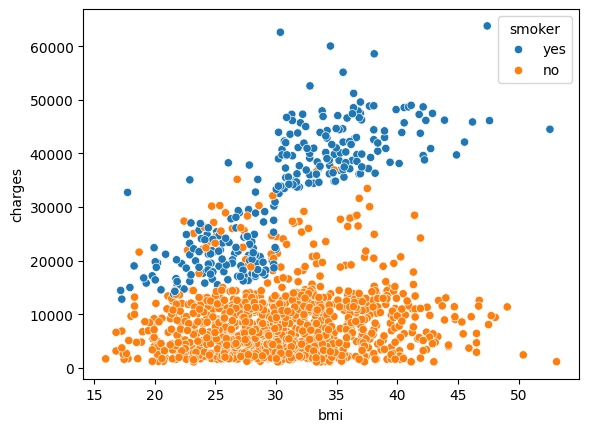

In [9]:
# bmi 와 charges의 관계 scatterplot 사용하기

sns.scatterplot(data=data, x='bmi', y='charges', hue='smoker')

plt.show()


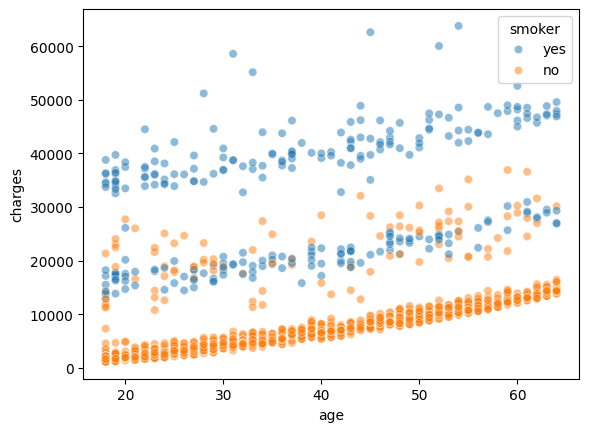

In [10]:
# 나이에 따른 분포 확인
# scatterplot 사용

sns.scatterplot(data=data, x='age', y='charges', hue='smoker', alpha=0.5)
plt.show()

### 위 데이터로 3층으로 나뉘는 구조는 bmi의 원인일 확률이 높음
### 다른원인이 있는지 확인

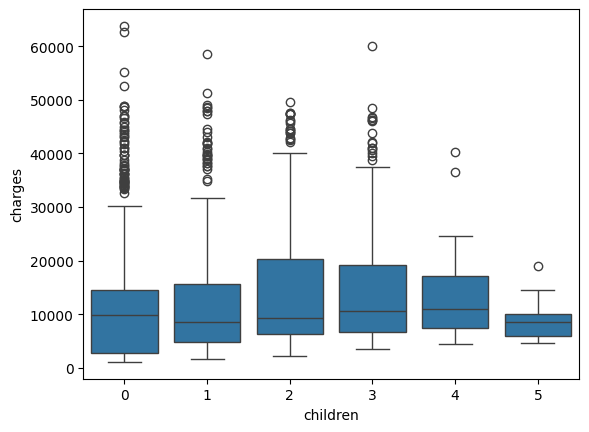

In [11]:
# 자녀수와 보험료의 의 관계

sns.boxplot(data=data, x='children', y='charges')
plt.show()

In [12]:
# heatmap 보기 전 범주형 데이터 변환
# 성별(sex), 지역(region), 흡연여부(smoker)를 한 번에 변환
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)
# drop_first=True는 '남/여' 중 '여'가 0이면 당연히 '남'이므로 열 하나를 삭제해 용량을 줄입니다.
data_encoded.head()

# heatmap을 그리기 전에 데이터를 정규화합니다.

# True/False로 되어 있는 컬럼 이름들만 리스트로 만듭니다.
target_cols = ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

# 해당 컬럼들만 int로 변환
data_encoded[target_cols] = data_encoded[target_cols].astype(int)
data_encoded.head()

,age,bmi,children,charges,is_obese_smoker,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,0,1,0,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0


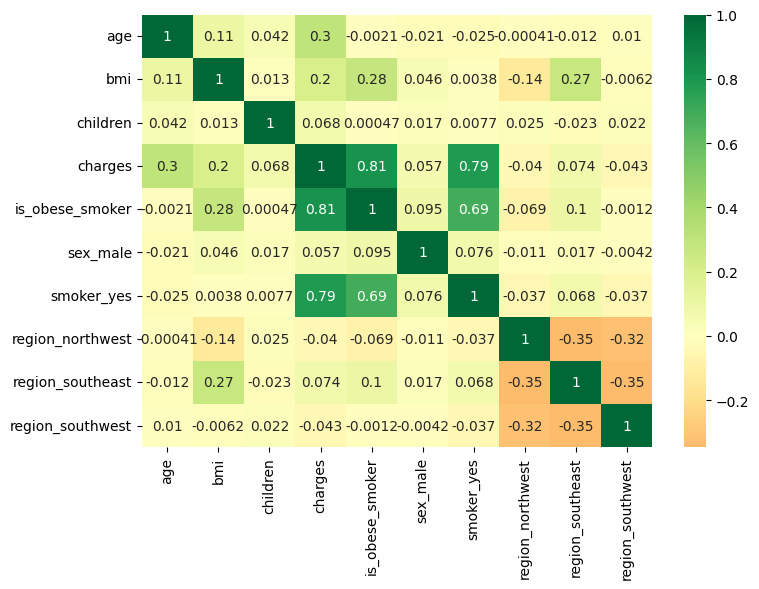

In [13]:
# 각 컬럼 별 charges와의 상관관계를 확인
# heatmap 이용하기


plt.figure(figsize=(8, 6))
sns.heatmap(data=data_encoded.corr(), center=0, cmap='RdYlGn', annot=True)
plt.tight_layout()
plt.show()

* smoke_yes / male / bmi30이상,흡연자 / children 이 특성들이 상관계수가 높다
* bmi/age도 어느정도는 상관계수가 있다

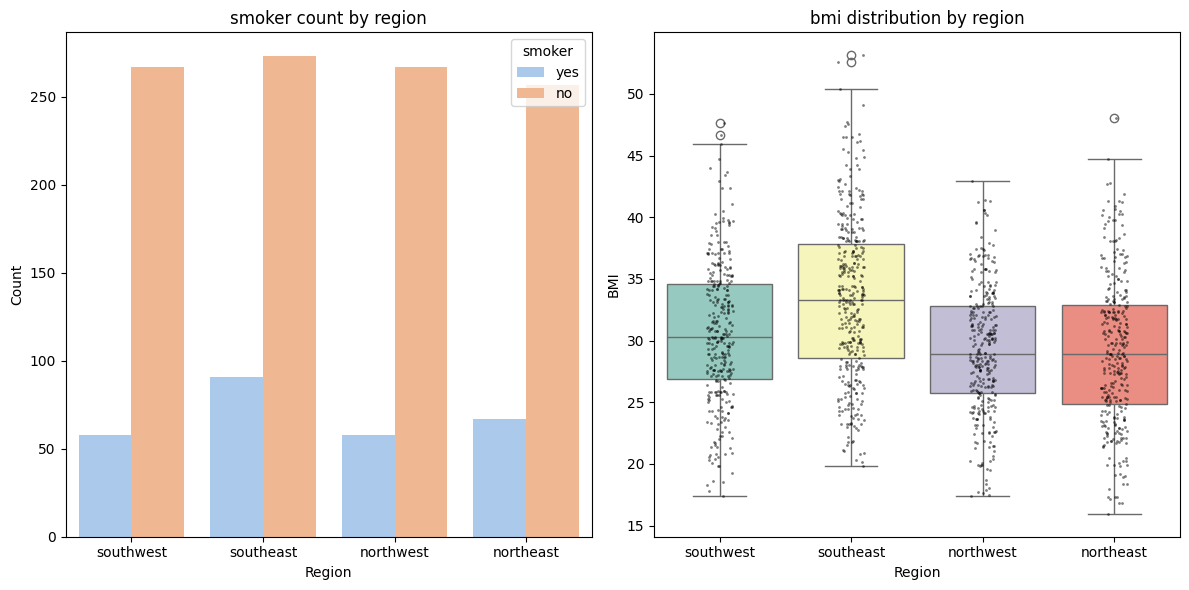

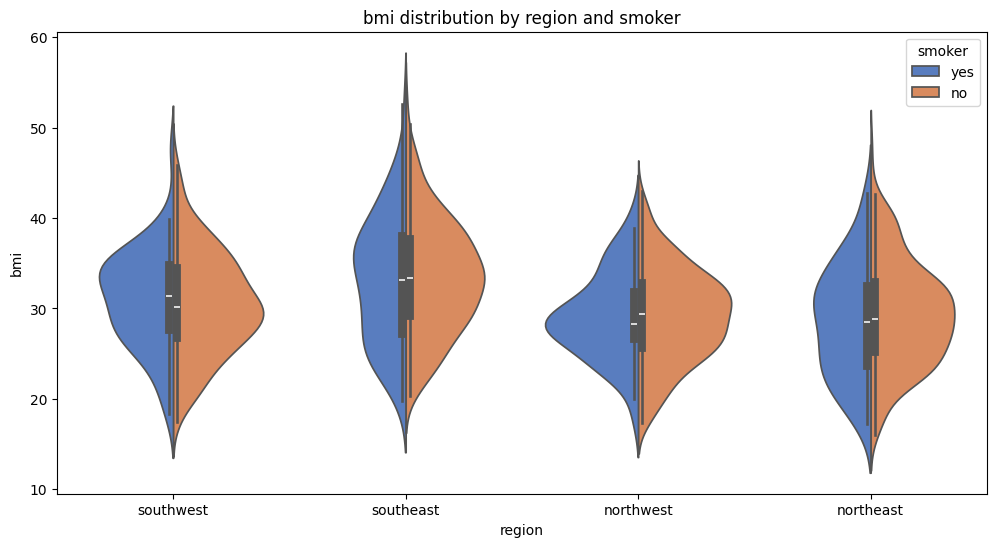

In [14]:
# 지역별 흡연자 / bmi지수 확인해보기
plt.figure(figsize=(12,6))
# 흡연자 지역분포 확인
plt.subplot(1,2,1)
sns.countplot(data=data, x='region',hue='smoker', palette='pastel')
plt.title('smoker count by region')
plt.xlabel('Region')
plt.ylabel('Count')

# 지역별 bmi분포(boxplot + stripplot)
plt.subplot(1,2,2)
sns.boxplot(data=data, x='region', y='bmi', palette='Set3')
# 실제 데이터 점들을 위에 살짝 뿌려주기
sns.stripplot(data=data, x='region', y='bmi', color='black',size=2,alpha=0.5)
plt.title('bmi distribution by region')
plt.xlabel('Region')
plt.ylabel('BMI')

plt.tight_layout()
plt.show()

# 지역별 '흡연자'들만의 BMI 분포 비교
plt.figure(figsize=(12,6))
sns.violinplot(data=data, x='region', y='bmi', hue='smoker',split=True, palette='muted')
plt.title('bmi distribution by region and smoker')
plt.show()

* southeast 에 흡연자와 bmi30 이상 사람들이 모여있는걸 확인
* 고 위험군지역 southeast

In [15]:
# 2. 범용 고위험 피처 (지역 상관없이 비만 + 흡연)
# 사실 이 데이터에서 가장 강력한 설명력을 가진 조합입니다
data_encoded['high_risk_southeast'] = (
    (data_encoded['region_southeast'] == 1) & 
    (data_encoded['bmi'] > 30) & 
    (data_encoded['smoker_yes'] == 1)
).astype(int)

data_encoded['obese_smoker'] = (
    (data_encoded['bmi'] > 30) & 
    (data_encoded['smoker_yes'] == 1)
    ).astype(int)

# 데이터확인
print("새로운특성 생성 후 컬럼목록")
print(data_encoded.columns.tolist())

# 상관계수 확인
print("\n[charges]와의 상관계수")
print(data_encoded[['high_risk_southeast', 'obese_smoker', 'charges']].corr()['charges'])

새로운특성 생성 후 컬럼목록
['age', 'bmi', 'children', 'charges', 'is_obese_smoker', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest', 'high_risk_southeast', 'obese_smoker']

[charges]와의 상관계수
high_risk_southeast    0.509694
obese_smoker           0.815375
charges                1.000000
Name: charges, dtype: float64


### 상관계수가 가장높은 지역,bmi,smoker 들만 모아 high_risk_southeast 라는 새로운 특성 생성
### 또한 가장 핵심적인 요소인 smoker와 bmi만 따로 특성 생성 obese_smoker

In [16]:
# data = data_encoded.head()
data=data_encoded.copy() 
data.head()

,age,bmi,children,charges,is_obese_smoker,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,high_risk_southeast,obese_smoker
0,19,27.900,0,16884.92400,0,0,1,0,0,1,0,0
1,18,33.770,1,1725.55230,0,1,0,0,1,0,0,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0,0,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0,0,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0,0,0


In [17]:
data.tail()

,age,bmi,children,charges,is_obese_smoker,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,high_risk_southeast,obese_smoker
1333,50,30.97,3,10600.5483,0,1,0,1,0,0,0,0
1334,18,31.92,0,2205.9808,0,0,0,0,0,0,0,0
1335,18,36.85,0,1629.8335,0,0,0,0,1,0,0,0
1336,21,25.80,0,2007.9450,0,0,0,0,0,1,0,0
1337,61,29.07,0,29141.3603,0,0,1,1,0,0,0,0


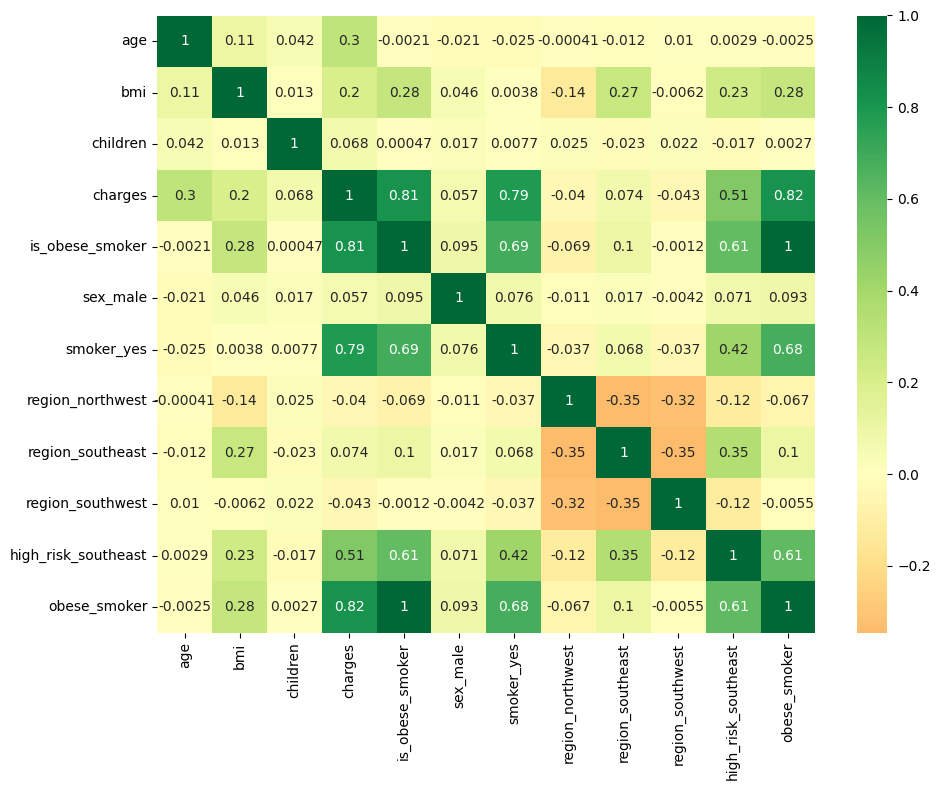

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=data.corr(), center=0, cmap='RdYlGn', annot=True)
plt.tight_layout()
plt.show()

## **로그변환 하지않고 재탐색 및 재학습**

In [207]:
# # charges 로그변환하여 이상치 줄이기

# import numpy as np

# # 'charges' 컬럼을 로그 변환하여 새로운 컬럼 생성 (혹은 덮어쓰기)
# data['charges'] = np.log1p(data['charges'])

# # 변환 후 분포 확인
# sns.histplot(data['charges'], kde=True)
# plt.show()


In [206]:
# # 로그변환 후 charges와 children의 관계 분석

# # 자녀수와 보험료의 의 관계

# sns.boxplot(data=data, x='children', y='charges')
# plt.show()

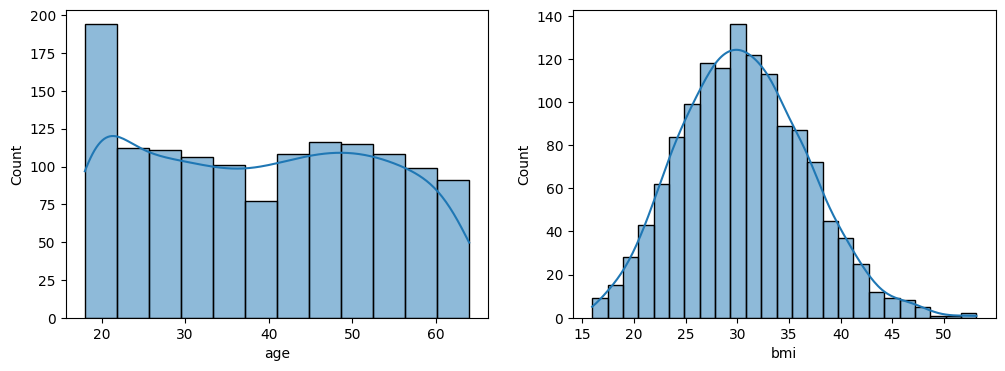

In [19]:
# 기존 위에있던 그래프의 이상치들이 사라진걸 확인
# 로그변환된 데이터로 학습을 시켰다면 predict 할 시엔 다시 원래데이터로 돌려주어야 한다

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 시각화로 쏠림 현상 확인
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data['age'], kde=True, ax=axes[0])
sns.histplot(data['bmi'], kde=True, ax=axes[1])
plt.show()


In [20]:
data.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

# 이상치 index 5개 삭제하기

In [21]:
# boolean 인덱싱으로 조건찾기

# 비흡연자(smoker == 'no')
# BMI 30 미만(bmi < 30)
# 의료비 3만 달러 이상(charges >= 30000)
# smoker_yes = 0인사람, bmi <30 인사람
# charges >30000
target_group = data[
               (data['smoker_yes'] == 0)&
               (data['bmi'] < 30)&
               (data['charges']> 30000)
]
# 2. 결과 출력
print(f"조건에 맞는 인원{len(target_group)}명")
print('-'* 30)
if len(target_group) > 0:
    # 주요정보만 출력
    print(target_group[['age', 'bmi', 'smoker_yes', 'charges']])
else:
    print("조건에 해당하는 데이터가 없습니다.")

조건에 맞는 인원5명
------------------------------
     age     bmi  smoker_yes      charges
62    64  24.700           0  30166.61817
115   60  28.595           0  30259.99556
242   55  26.800           0  35160.13457
387   50  25.365           0  30284.64294
936   44  29.735           0  32108.66282


In [22]:
# 이상치 5명 삭제
outliers = [62,115,242,387,936]

data_final = data.drop(index=outliers)

print(f"데이터 삭제 전 갯수 : {len(data)}")
print(f"데이터 삭제 후 갯수 : {len(data_final)}")
print(f"삭제된 인덱스가 아직 남아있는가? {any(i in data_final.index for i in outliers)}")

데이터 삭제 전 갯수 : 1338
데이터 삭제 후 갯수 : 1333
삭제된 인덱스가 아직 남아있는가? False


In [23]:
# # 새로만든 high_risk_southeast 컬럼과 region_southeast 컬럼의 상관계수 확인

# # 두 컬럼 간의 상관계수 확인
# overlap = data_encoded[['region_southeast', 'high_risk_southeast']].corr()
# print(overlap)

# # 또는 시각적으로 확인 (얼마나 겹치는지)
# pd.crosstab(data_encoded['region_southeast'], data_encoded['high_risk_southeast'])

## **모델 학습 및 예측평가**

In [ ]:
# 데이터 분할 train_test_split
# 기존에 여러번 시도를 했었기에 final을 붙힘
# 1. charges를 정규분포에 맞추기 위해 로그변환 하여 1회 시도 xgboost 0.86


x = data_final.drop('charges', axis=1)
y = data_final['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### bmi는 낮고 흡연도 안하는데 보험료가 높은사람이 있을까 ?
### bmi도 높고 흡연도 하는데 보험료가 낮은사람이 있을까 ?
### 두가지 다 있다면 이상치를 어떻게 처리할것인가 제거할것인가 스케일링 할것인가

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print("분할과 스케일링이 완벽하게 완료되었습니다!")
print(x_train_scaled.shape, x_test_scaled.shape)

분할과 스케일링이 완벽하게 완료되었습니다!
(1066, 11) (267, 11)


In [ ]:
# 2. 효준님 방법에 따라 bmi30미만, 비흡연자인데 보험료 3만달러 이상 납부하는 이상치 5개 삭제
# 후 성능 재 평가 하여 두번째 시도는 0.907918 r2score LinearRegression
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# # [점검 1] y_test에 문제가 있는지 확인
# print("--- 데이터 점검 ---")
# print(f"y_test 내 무한대 개수: {np.isinf(y_test).sum()}")
# print(f"y_test 내 결측치 개수: {np.isnan(y_test).sum()}")
# print(f"y_test 최대값: {y_test.max()}") # 이게 15를 넘어가면 expm1에서 무한대가 될 수 있음

# [점검 2] 만약 y_test에 무한대가 있다면 정상 범위로 강제 조정
# y_test_safe = np.clip(y_test, a_min=0, a_max=15)
# y_test_original = np.expm1(y_test_safe)
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(alpha=0.01),
    'Ridge': Ridge(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=0.01),
    'RandomForest': RandomForestRegressor(n_estimators=1000, max_depth=10, random_state=89),
    'DecisionTree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'LGBM': LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=31, random_state=42, force_col_wise=True),
    'XGBOOST': XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=5, random_state=42)
}

results = []

for name, model in models.items():
    # try:
        # 1. 모델 학습
        model.fit(x_train_scaled, y_train)
        
        # 2. 모델 예측 및 안전장치
        y_pred = model.predict(x_test_scaled)
        # y_pred_log = np.clip(y_pred_log, a_min=0, a_max=15) # 예측값도 안전하게 제한
        
        # 3. 원래 단위로 복원
        # y_pred_original = np.expm1(y_pred_log)

        # 4. 성능 평가 (안전한 정답지 사용)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        results.append({
            "model": name,
            "r2_score": r2,
            "mae": mae,
            "mse": mse
        })
    # except Exception as e:
    #     print(f"{name} 모델에서 에러 발생: {e}")

# 결과 출력
results_df = pd.DataFrame(results).sort_values(by="r2_score", ascending=False)
print("\n--- 최종 결과 ---")
print(results_df)

[LightGBM] [Info] Total Bins 334
[LightGBM] [Info] Number of data points in the train set: 1066, number of used features: 11
[LightGBM] [Info] Start training from score 13546.814417

--- 최종 결과 ---
              model  r2_score          mae           mse
0  LinearRegression  0.907918  2036.909765  1.126139e+07
1             Lasso  0.907917  2036.908299  1.126141e+07
2             Ridge  0.907909  2037.703589  1.126248e+07
3        ElasticNet  0.907841  2041.875965  1.127075e+07
7           XGBOOST  0.901147  2043.918283  1.208938e+07
6              LGBM  0.889736  2172.075976  1.348500e+07
5      DecisionTree  0.883480  2187.204896  1.425001e+07
4      RandomForest  0.877351  2193.906941  1.499963e+07


## **효준님 방법으로 이상치 5명 제거 후 실행**

## 여기서 점수를 더 올리고자 특성엔지니어링 실행하기

In [ ]:
# 파생변수 추가
# 나이가 들면서 BMI가 높을 때 의료비가 폭발적으로 상승하는 경향을 반영 (곱하기)
# **특성 간의 상호작용(Interaction)**age와 bmi를 곱해서 새로운 변수를 만듦
# 그러나 성능은 미세한 점수 떨어짐

data_final['age_bmi'] = data_final['age'] * data_final['bmi']
# x/y분리하기

# cols_to_drop = ['charges'] 
# if 'charges_log' in data_final.columns:
#     cols_to_drop.append('charges_log')

x_final = data_final.drop(columns=['charges'], axis=1)
y_final = data_final['charges']

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 모델 비교실행
result_upgrade = []

for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)


    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    result_upgrade.append({'model': name, 'rmse': rmse,
                     'r2': r2,
                     'mse': mse,
                     'mae': mae})

result_upgrade_df = pd.DataFrame(result_upgrade).sort_values(by='r2', ascending=False)
print(f"=====age_bmi특성 추가 후 성능비교=====")
display(result_upgrade_df)
print("\n사용한 특성(Columns):", x.columns.tolist())

[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 1066, number of used features: 12
[LightGBM] [Info] Start training from score 13546.814417
=====age_bmi특성 추가 후 성능비교=====


,model,rmse,r2,mse,mae
0,LinearRegression,3364.789191,0.907424,1.132181e+07,2049.637673
1,Lasso,3364.789284,0.907424,1.132181e+07,2049.633899
2,Ridge,3365.515809,0.907384,1.132670e+07,2051.311275
3,ElasticNet,3368.535092,0.907217,1.134703e+07,2058.400614
7,XGBOOST,3517.114975,0.898852,1.237010e+07,2046.220540
6,LGBM,3664.562279,0.890193,1.342902e+07,2155.970267
4,RandomForest,3708.779612,0.887527,1.375505e+07,2107.367679
5,DecisionTree,3785.327564,0.882837,1.432870e+07,2189.893763



사용한 특성(Columns): ['age', 'bmi', 'children', 'is_obese_smoker', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest', 'high_risk_southeast', 'obese_smoker']


# **선형계수확인을 통해 어떤특성이 가장 성능에 영향을 미쳤는지 확인**

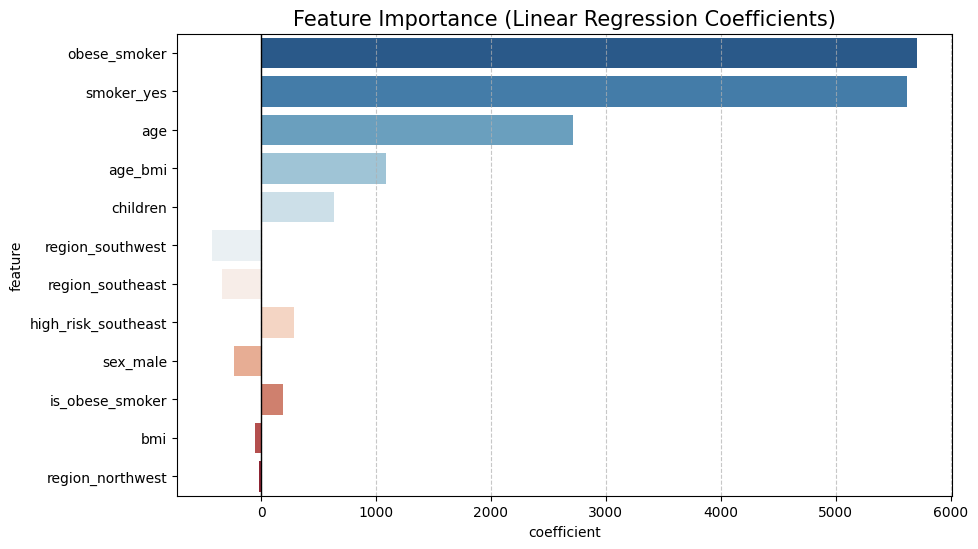

In [ ]:
# 어떤 변수가 성능에 가장 영향을 미치는지 확인
model_lr = models['LinearRegression']
coef_values=model_lr.coef_
feature=x_final.columns

# 데이터프레임 생성
coef_df = pd.DataFrame({'feature': feature, 'coefficient': coef_values})
coef_df['abs_coefficient'] = coef_df['coefficient'].abs() # 절댓값씌우기
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)

# 3. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='coefficient', y='feature', data=coef_df, palette='RdBu_r')
plt.title('Feature Importance (Linear Regression Coefficients)', fontsize=15)
plt.axvline(x=0, color='black', linewidth=1) # 0 지점에 세로선 추가
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



## **Scatter 산점도로 예측값과 실제값 비교해보기**

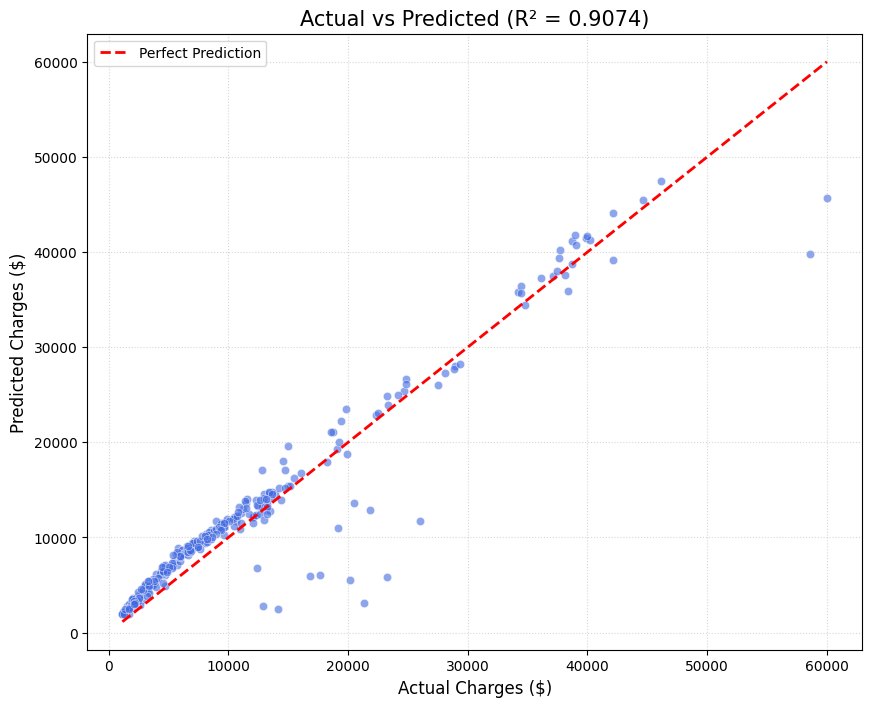

In [35]:
y_pred = models['LinearRegression'].predict(x_test_scaled)
plt.figure(figsize=(10,8))

# 산점도 그리기
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='royalblue')

# 기준선 그리기
# 실제값과 예측값이 완벽히 일치하면 점들이 빨간선 위에 올라옴
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='--', lw=2, label='Perfect Prediction')

#그래프 꾸미기
plt.xlabel('Actual Charges ($)', fontsize=12)
plt.ylabel('Predicted Charges ($)', fontsize=12)
plt.title(f'Actual vs Predicted (R² = {result_upgrade_df.iloc[0]["r2"]:.4f})', fontsize=15)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.5)

plt.show()

In [ ]:
# 로그변환하여 성능평가를 했을때 점수가 낮게나옴 그래서 로그변환 하지 않고 성능평가하기로 함
# # 효준님 방식으로 이상치 5명 제거 후 실행

# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# # 1. 만약 data_encoded에 로그 컬럼이 없다면 새로 만듭니다.
# # 원본 data에 있는 'charges'를 가져와서 로그 변환합니다.
# if 'charges_log' not in data_encoded.columns:
#     # 원본 data의 인덱스와 data_encoded의 인덱스가 일치한다고 가정합니다.
#     data_encoded['charges_log'] = np.log1p(data['charges'])

# # 2. 다시 분리 시도
# drop_cols = ['charges', 'charges_log']
# # x에는 정답(charges 관련)을 모두 빼고 문제만 남깁니다.
# x = data_encoded.drop(columns=[col for col in drop_cols if col in data_encoded.columns])

# # 3. y에는 방금 만든 로그 정답지를 넣습니다.
# y = data_encoded['charges_log']

# # 4. 데이터 분할
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # 5. 스케일링
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

# print("성공적으로 분할되었습니다!")
# print("학습용 컬럼 개수:", x.shape[1])
# print("학습용 컬럼 목록:", x.columns.tolist())

성공적으로 분할되었습니다!
학습용 컬럼 개수: 11
학습용 컬럼 목록: ['age', 'bmi', 'children', 'is_obese_smoker', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest', 'high_risk_southeast', 'obese_smoker']


In [ ]:
# 드디어 모든 퍼즐 조각이 맞춰졌네요! charges_log가 없었던 문제와 데이터 누수(Data Leakage) 문제를 모두 해결한 '최종 에러 프리' 코드입니다.

#이 코드는 데이터 분할 → 스케일링 → 모델 비교 → 결과 복원까지 한 번에 수행합니다. 이 셀 하나만 실행하시면 됩니다.

# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import r2_score, mean_absolute_error
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

# # 1. 데이터 클리닝 및 정답지(Target) 생성
# # 만약 data_encoded에 로그 컬럼이 없다면 새로 생성
# if 'charges_log' not in data_encoded.columns:
#     data_encoded['charges_log'] = np.log1p(data['charges'])

# # 2. 문제지(X)와 정답지(y) 분리
# # 정답과 관련된 모든 컬럼('charges', 'charges_log')을 확실히 제거하여 Leakage 방지
# drop_cols = ['charges', 'charges_log']
# X = data_encoded.drop(columns=[col for col in drop_cols if col in data_encoded.columns])
# y = data_encoded['charges_log']

# # 3. 데이터 분할 (8:2 비율)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # 4. 스케일링 (수치형 변수들의 체급 맞추기)
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

# # 5. 모델 라인업 설정
# models = {
#     'LinearRegression': LinearRegression(),
#     'Lasso': Lasso(alpha=0.01),
#     'Ridge': Ridge(alpha=1.0),
#     'ElasticNet': ElasticNet(alpha=0.01),
#     'RandomForest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
#     'DecisionTree': DecisionTreeRegressor(max_depth=5, random_state=42),
#     'LGBM': LGBMRegressor(n_estimators=100, learning_rate=0.05, num_leaves=31, random_state=42),
#     'XGBOOST': XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)
# }

# results = []
# y_test_original = np.expm1(y_test) # 실제 달러($) 정답지

# # 6. 반복문 학습 및 평가
# for name, model in models.items():
#     # 학습
#     model.fit(x_train_scaled, y_train)
    
#     # 예측 및 안전장치(무한대 방지)
#     y_pred_log = model.predict(x_test_scaled)
#     y_pred_log = np.clip(y_pred_log, a_min=0, a_max=15) 
    
#     # 원래 단위($)로 복원
#     y_pred_original = np.expm1(y_pred_log)

#     # 평가
#     r2 = r2_score(y_test_original, y_pred_original)
#     mae = mean_absolute_error(y_test_original, y_pred_original)

#     results.append({
#         "model": name,
#         "r2_score": r2,
#         "mae": mae
#     })

# # 7. 결과 출력
# results_df = pd.DataFrame(results).sort_values(by="r2_score", ascending=False)
# print("--- 최종 모델 성능 비교 ---")
# print(results_df)
# print("\n사용한 특성(Columns):", x.columns.tolist())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 334
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 11
[LightGBM] [Info] Start training from score 2.309741
--- 최종 모델 성능 비교 ---
              model  r2_score       mae
7           XGBOOST  0.861137  0.181649
6              LGBM  0.857993  0.186434
5      DecisionTree  0.857005  0.215873
4      RandomForest  0.852362  0.189426
2             Ridge  0.809123  0.260266
0  LinearRegression  0.809094  0.260201
3        ElasticNet  0.793928  0.273853
1             Lasso  0.764650  0.307587

사용한 특성(Columns): ['age', 'bmi', 'children', 'is_obese_smoker', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest', 'high_risk_southeast', 'obese_smoker']


## 새롭게 데이터 분리하여 학습시키기
* 로그변환 후 의 모델학습

In [28]:
# x_final = data_final.drop(columns=['charges', 'charges_log'], axis=1)
# y_final = data_final['charges']

# x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.2, random_state=55)

# # scaler
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)


# results_final = []

# # 1. 정답지 복원 (테스트 데이터용)
# y_test_original = np.expm1(y_test)

# # 2. 모델 리스트 (기존 설정 유지)
# models = {
#     'LinearRegression': LinearRegression(),
#     'Lasso': Lasso(alpha=0.01),
#     'Ridge': Ridge(alpha=1.0),
#     'ElasticNet': ElasticNet(alpha=0.01),
#     'RandomForest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=89),
#     'DecisionTree': DecisionTreeRegressor(max_depth=5, random_state=42),
#     'LGBM': LGBMRegressor(n_estimators=100, learning_rate=0.05, num_leaves=31, random_state=42, force_col_wise=True),
#     'XGBOOST': XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)
# }

# # 3. 전체 모델 반복 학습 및 평가
# for name, model in models.items():
#     # 모델 학습
#     model.fit(x_train_scaled, y_train)
    
#     # 모델 예측
#     y_pred_log = model.predict(x_test_scaled)
#     y_pred_log = np.clip(y_pred_log, a_min=0, a_max=15) # 예측값 안전장치
    
#     # 원래 단위($)로 복원
#     y_pred_original = np.expm1(y_pred_log)

#     # 성능 평가
#     r2 = r2_score(y_test_original, y_pred_original)
#     mae = mean_absolute_error(y_test_original, y_pred_original)

#     results_final.append({
#         "model": name,
#         "r2_score": r2,
#         "mae": mae
#     })

# # 4. 결과 출력 및 정렬
# results_df_final = pd.DataFrame(results_final).sort_values(by="r2_score", ascending=False)

# print("=== [이상치 5명 제거 후] 전체 모델 성능 결과 ===")
# print(results_df_final)